In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [3]:
pip install itables

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.3 MB/s eta 0:00:00


In [4]:
import itables
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

In [5]:
data = pd.read_csv("/content/initial cleaned data.csv")

In [6]:
stacked_df = pd.DataFrame(data[["year","biofuel_share_elec","coal_share_elec","gas_share_elec","hydro_share_elec","low_carbon_share_elec",
                                "nuclear_share_elec","oil_share_elec","other_renewables_share_elec","solar_share_elec","wind_share_elec"]])

# Grouping the stacked_df

A = stacked_df.groupby('year')[["biofuel_share_elec","coal_share_elec","gas_share_elec","hydro_share_elec","low_carbon_share_elec",
                                "nuclear_share_elec","oil_share_elec","other_renewables_share_elec","solar_share_elec","wind_share_elec"]].sum()

In [8]:
fig = px.bar(A,
             x=A.index,
             y=["biofuel_share_elec","coal_share_elec","gas_share_elec","hydro_share_elec","low_carbon_share_elec",
                "nuclear_share_elec","oil_share_elec","other_renewables_share_elec","solar_share_elec","wind_share_elec"],
             title="Increasing share of electricity generation by different methods across years",
             labels={"value": "Share of Electricity Generation", "variable": "Energy Source", "year": "Year"},
             barmode='stack'
            )

fig.show()

#### <span style="color:green"> Over the years, there has been a clear upward trend in electricity generation capacities, which may be attributed to the following factors: </span>

1. Adoption of technology from more developed countries.
2. Increased focus on renewable energy sources, leading to these sudden spikes.

<span style="color:green"> Additionally, the instances of sudden increases observed in the visualization could be due to inaccuracies in the data collection process. </span>

In [10]:
from plotly.subplots import make_subplots

# Assuming you have the 'B' DataFrame as described in your code

B = data.groupby('year')[['fossil_share_energy','renewables_share_energy','nuclear_share_energy']].mean().reset_index()
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'pie'}]])



# Assuming you have the 'B' DataFrame as described in your code

# Create subplots with one pie chart
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'pie'}]])

# Loop through each year from 1992 to 2022
for year in range(1992, 2023):
    # Filter data for the current year
    filtered_df = B[B['year'] == year]

    # Add a pie trace for the current year
    fig.add_trace(go.Pie(
                    labels=['Fossil', 'Renewable', 'Nuclear'],
                    values=[filtered_df['fossil_share_energy'].values[0],
                            filtered_df['renewables_share_energy'].values[0],
                            filtered_df['nuclear_share_energy'].values[0]],
                    textinfo='label+percent', hole=.3))

# Define slider steps for each year
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{'visible': [False] * len(fig.data)},
              {'title_text': f'{2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
        label=str(1992 + i)
    )
    step['args'][0]['visible'][i] = True
    steps.append(step)

# Make the first trace visible by default
fig.data[0].visible = True

# Update layout with title, slider, and formatting
fig.update_layout(
    title_text=f'Share of Electricity Generated',
    title_font_size=24,
    title_x=0.5,
    sliders=[dict(
        active=0,
        currentvalue={"prefix": "Year: "},
        pad={"t": 50},
        steps=steps
    )],
    height=500,
    width=1000,
    font=dict(family='Arial', size=12),
    margin=dict(t=80, l=50, r=50, b=50)
)

# Show the plot
fig.show()

#### <span style="color:green">An examination of the distribution over the years reveals a clear trend towards an increased focus and inclination for generating energy from renewable sources. </span>

In [11]:
def sparklines(ascending=False):
    # Assuming you have the 'data' DataFrame as described in your code

    # Select relevant columns
    D = data[['electricity_generation', 'electricity_demand', 'year', 'country', 'energy_per_capita', 'population']]

    # Group by country and calculate the mean population, select top/bottom 5
    A = data.groupby('country')['population'].mean().reset_index().sort_values(by='population', ascending=ascending).head()['country'].tolist()

    # Filter data based on conditions
    D = D[(D['electricity_demand'] != 0) & (D['country'].isin(A))]

    # Generate sparklines plot
    title = "Energy Per Capita of Top 5 countries population wise" if not ascending else "Energy Per Capita of Bottom 5 countries population wise"
    fig = px.line(D, x="year", y="energy_per_capita", facet_row="country", color='country', symbol="country",
                  facet_row_spacing=0.01, height=500, width=1000, title=title)

    # Adjust layout
    fig.update_yaxes(visible=True, fixedrange=True, nticks=2, showgrid=False, zeroline=False, title=None)
    fig.update_layout(annotations=[], overwrite=True, showlegend=True, plot_bgcolor="black", margin=dict(t=35, l=10, b=10, r=10))
    fig.show(config=dict(displayModeBar=False))

In [12]:
sparklines()

In [13]:
sparklines(True)

#### Upon observing the y-axis positioning of the sparklines, a two-fold difference in values is noted between the TOP-5 and BOTTOM-5. It can be concluded that countries with larger populations tend to have lower energy_per_capita, and conversely, countries with smaller populations exhibit higher energy_per_capita.</span>

In [14]:
E = data[data['year']>=2000].groupby(['year','country'])[['electricity_demand','electricity_generation']].mean().reset_index()
E['ratio'] = E['electricity_generation']/E['electricity_demand']

E['electricity_demand'] = E['electricity_demand'].mask(E.electricity_demand == 0, 1)
E['electricity_demand'] = np.log(E['electricity_demand'])
E['electricity_demand'] = E['electricity_demand'].mask((E.electricity_demand <= 0 | E.electricity_demand.isna()), 0)


E['electricity_generation'] = E['electricity_generation'].mask(E.electricity_generation == 0, 1)
E['electricity_generation'] = np.log(E['electricity_generation'])
E['electricity_demand'] = E['electricity_demand'].mask((E.electricity_generation <= 0 | E.electricity_generation.isna()), 0)

In [15]:
fig = px.scatter(E,x = 'electricity_demand', y = 'electricity_generation',
                 animation_frame = 'country',color = 'year',title = 'Correlation between Electricity Generation and Demand',size = abs(E.electricity_generation),
                 hover_name="country",  labels={'y':'Electricity Demand in terawatt-hours'},
                range_x=[-1,E.electricity_demand.max()], range_y=[-2,E.electricity_generation.max()])
fig.update_yaxes(visible=True, zeroline=False)

fig.update_layout(
        showlegend=True,
        plot_bgcolor="black",
        height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50))

fig.show()

**The visualization suggests that the demand and supply of electricity have been steadily increasing over the years. Interestingly, in more developed nations such as the USA, Canada, UK, and France, there hasn't been a significant surge in demand or generation capacity, with values remaining relatively stable over several years.**

**This pattern is also observed in smaller European countries like Norway, the Netherlands, North Macedonia, Serbia, and Luxembourg.**

**In contrast, countries with emerging economies, including India, China, Argentina, and Israel, have exhibited a sharp upward trend.**

In [16]:
F = data[data.year >= 2000].groupby('year')[['greenhouse_gas_emissions','fossil_electricity']].mean().reset_index()

g1 = go.Bar(x=F.year, y=F.fossil_electricity, name = "Fossil Electricity",  marker_color='goldenrod')
# Create a line chart
g2 = go.Bar(x=F.year, y=F.greenhouse_gas_emissions, name = "greenhouse_gas_emissions",marker_color='burlywood')

fig = go.Figure(data=[g1,g2])

fig.update_layout(barmode='relative',title_text = "Electricity Generated by Fossils & Emissions of Greenhouse Gas",
        showlegend=True,
        plot_bgcolor="black",
                 height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50))
fig.show()

 #### <span style="color:green"> Inspite of many measures and regulations, the greenhouse gas emissions has relatively grown over the past couple of decades which suggests there is a need for shifting focus on more renewable sources for energy generation.</span>

In [17]:
G = data.groupby(['year','country']).renewables_share_elec.mean().reset_index()

fig = px.line(G,x='year',y='renewables_share_elec',animation_frame='country', color_discrete_sequence=['gold'], markers=True,
        title = "Year on Year growth in Share of electricity generated by renewables")

fig.update_layout(

        plot_bgcolor="black",
        height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50))

#### With continuous advancements and focus of International groups and countries to promote renewable sources as the primary sources of energy, many countries are continuously increasing their focus to renewable sources for the energy securities of their respective states.

**Seeing the previous chart that greenhouse gas emission still increasing inspite the fact that companies started to adapt more and more renewable sources for electricity generation.**

**Hopefully if the trend continuous, maybe in a couple of decades, we can minimize this greenhouse gas emissions caused by electricity generation.**

## Classifying countries based on their energy security and self-sufficiency

- Target label: A categorical label representing different levels of energy self-sufficiency (e.g., "High Self-Sufficiency," "Moderate Self-Sufficiency," "Low Self-Sufficiency").
- Rationale: This classification task could help identify countries that are heavily reliant on energy imports and potential areas for increasing domestic energy production or diversification.

# Data Preprocessing

In [18]:
data.net_elec_imports.loc[data.net_elec_imports == 0] = 1

In [19]:
data['energy_production_ratio'] = data.electricity_generation/data.net_elec_imports

In [20]:
data.energy_production_ratio.describe()

count     7362.000000
mean        20.557277
std        692.227233
min     -14206.454545
25%          0.000000
50%          0.000000
75%         14.610000
max      24327.000000
Name: energy_production_ratio, dtype: float64

<Axes: ylabel='energy_production_ratio'>

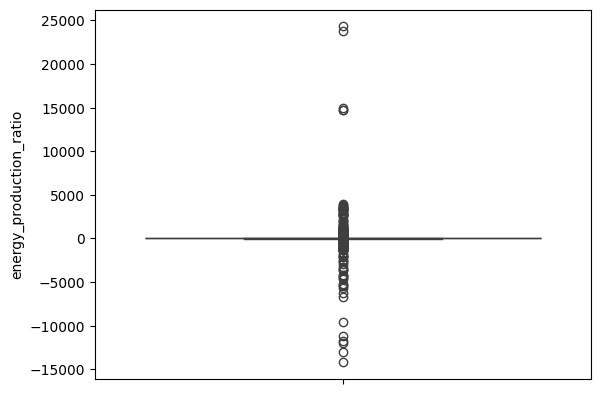

In [21]:
sns.boxplot(data['energy_production_ratio'])

### Creating a ratio that gives us an estimate of how much electricity is being generated divided by Net electricity imports .


#### Columns like net_elec_imports, energy_production_ratio, various types of energy production values, per_capita energy generation values can help in building a better model, hence we need to drop the rest of the columns and more closely observe features which are of greater significance for us.

In [23]:
ls = ['change_pct','change_twh','share_elec','cons_per_capita','prod_per_capita',
      'carbon_intensity_elec','energy_per_gdp','fossil_electricity','greenhouse_gas_emissions','other_renewable_exc_biofuel_electricity',
     'other_renewables_elec_per_capita_exc_biofuel','other_renewables_share_elec_exc_biofuel','iso_code',
     ]

unnec = []

# Loop through unique column names in the DataFrame
for i in data.columns.unique():
    # Check if the last 10 characters of the column name match any suffix in the list
    if i[-10:] in ls:
        unnec.append(i)
    # Check if the last 12 characters of the column name match any suffix in the list
    elif i[-12:] in ls:
        unnec.append(i)
    # Check if the last 15 characters of the column name match any suffix in the list, or the column name is directly in the list
    elif i[-15:] in ls or i in ls:
        unnec.append(i)

# Drop the columns identified as unnecessary
data1 = data.drop(unnec,axis = 1)

In [24]:
data1.head()

country  year  population           gdp  biofuel_consumption  \
0  Afghanistan  1974  11869881.0  1.430911e+10                  0.0   
1  Afghanistan  1975  12157390.0  1.517777e+10                  0.0   
2  Afghanistan  1976  12425276.0  1.602361e+10                  0.0   
3  Afghanistan  1977  12687308.0  1.520736e+10                  0.0   
4  Afghanistan  1978  12938864.0  1.633783e+10                  0.0   

   biofuel_elec_per_capita  biofuel_electricity  biofuel_share_energy  \
0                      0.0                  0.0                   0.0   
1                      0.0                  0.0                   0.0   
2                      0.0                  0.0                   0.0   
3                      0.0                  0.0                   0.0   
4                      0.0                  0.0                   0.0   

   coal_consumption  coal_elec_per_capita  ...  solar_electricity  \
0               0.0                   0.0  ...                0.0   
1               0.0                   0.0  ...                0.0   
2               0.0                   0.0  ...                0.0   
3               0.0                   0.0  ...                0.0   
4               0.0                   0.0  ...                0.0   

   solar_energy_per_capita  solar_share_energy  wind_consumption  \
0                      0.0                 0.0               0.0   
1                      0.0                 0.0               0.0   
2                      0.0                 0.0               0.0   
3                      0.0                 0.0               0.0   
4                      0.0                 0.0               0.0   

   wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
0                   0.0               0.0                     0.0   
1                   0.0               0.0                     0.0   
2                   0.0               0.0                     0.0   
3                   0.0               0.0                     0.0   
4                   0.0               0.0                     0.0   

   wind_share_energy  gdp_exp_moving_avg  energy_production_ratio  
0                0.0        1.430911e+10                      0.0  
1                0.0        1.478687e+10                      0.0  
2                0.0        1.528403e+10                      0.0  
3                0.0        1.525877e+10                      0.0  
4                0.0        1.556854e+10                      0.0  

[5 rows x 74 columns]